<a href="https://colab.research.google.com/github/Faza20-lab/Projet_stats/blob/Marine/Projet_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preset**

In [140]:
!pip install netCDF4

In [141]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from scipy.stats import norm, shapiro, kstest, genextreme, genpareto
from scipy.stats import gamma
import scipy.stats as st


file_prec = '/content/drive/MyDrive/data/ERA5_prec_daily_1940_2023_FR_brittany.nc'
ds = xr.open_dataset(file_prec)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Visualisation des données:**

## Visualisation des données de precipitations et définition de X:

In [142]:
ds_djf = ds.sel(time=ds['time'].dt.month.isin([1, 2, 12]))
print(ds_djf)
ds_djf.sizes

<xarray.Dataset> Size: 5MB
Dimensions:    (Latitude: 12, Longitude: 14, time: 7550)
Coordinates:
  * Latitude   (Latitude) float64 96B 49.0 48.75 48.5 48.25 ... 46.75 46.5 46.25
  * Longitude  (Longitude) float64 112B -4.75 -4.5 -4.25 ... -2.0 -1.75 -1.5
  * time       (time) datetime64[ns] 60kB 1940-01-01 1940-01-02 ... 2023-02-28
    lon        (Longitude) float64 112B ...
    lat        (Latitude) float64 96B ...
    height     float64 8B ...
Data variables:
    pr         (Latitude, Longitude, time) float32 5MB ...


Frozen({'Latitude': 12, 'Longitude': 14, 'time': 7550})

In [143]:
ds.sizes

Frozen({'Latitude': 12, 'Longitude': 14, 'time': 30449})

In [144]:
print(ds['time'])

<xarray.DataArray 'time' (time: 30449)> Size: 244kB
array(['1940-01-01T00:00:00.000000000', '1940-01-02T00:00:00.000000000',
       '1940-01-03T00:00:00.000000000', ..., '2023-05-11T00:00:00.000000000',
       '2023-05-12T00:00:00.000000000', '2023-05-13T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 244kB 1940-01-01 1940-01-02 ... 2023-05-13
    height   float64 8B ...


In [145]:
ds.time.values[:10]

array(['1940-01-01T00:00:00.000000000', '1940-01-02T00:00:00.000000000',
       '1940-01-03T00:00:00.000000000', '1940-01-04T00:00:00.000000000',
       '1940-01-05T00:00:00.000000000', '1940-01-06T00:00:00.000000000',
       '1940-01-07T00:00:00.000000000', '1940-01-08T00:00:00.000000000',
       '1940-01-09T00:00:00.000000000', '1940-01-10T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [146]:
ds.time.values[10:]

array(['1940-01-11T00:00:00.000000000', '1940-01-12T00:00:00.000000000',
       '1940-01-13T00:00:00.000000000', ...,
       '2023-05-11T00:00:00.000000000', '2023-05-12T00:00:00.000000000',
       '2023-05-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [147]:
print(ds.Latitude.values)
print(ds.Longitude.values)

[49.   48.75 48.5  48.25 48.   47.75 47.5  47.25 47.   46.75 46.5  46.25]
[-4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25 -2.
 -1.75 -1.5 ]


In [148]:
da = ds['pr'].isel(time=0)   # un jour = une carte
df = da.to_dataframe().reset_index()

In [149]:
print(df.head())

   Latitude  Longitude       time   lon   lat  height  pr
0      49.0      -4.75 1940-01-01 -4.75  49.0     0.0 NaN
1      49.0      -4.50 1940-01-01 -4.50  49.0     0.0 NaN
2      49.0      -4.25 1940-01-01 -4.25  49.0     0.0 NaN
3      49.0      -4.00 1940-01-01 -4.00  49.0     0.0 NaN
4      49.0      -3.75 1940-01-01 -3.75  49.0     0.0 NaN


In [150]:
print(da)

<xarray.DataArray 'pr' (Latitude: 12, Longitude: 14)> Size: 672B
[168 values with dtype=float32]
Coordinates:
  * Latitude   (Latitude) float64 96B 49.0 48.75 48.5 48.25 ... 46.75 46.5 46.25
  * Longitude  (Longitude) float64 112B -4.75 -4.5 -4.25 ... -2.0 -1.75 -1.5
    time       datetime64[ns] 8B 1940-01-01
    lon        (Longitude) float64 112B ...
    lat        (Latitude) float64 96B ...
    height     float64 8B ...


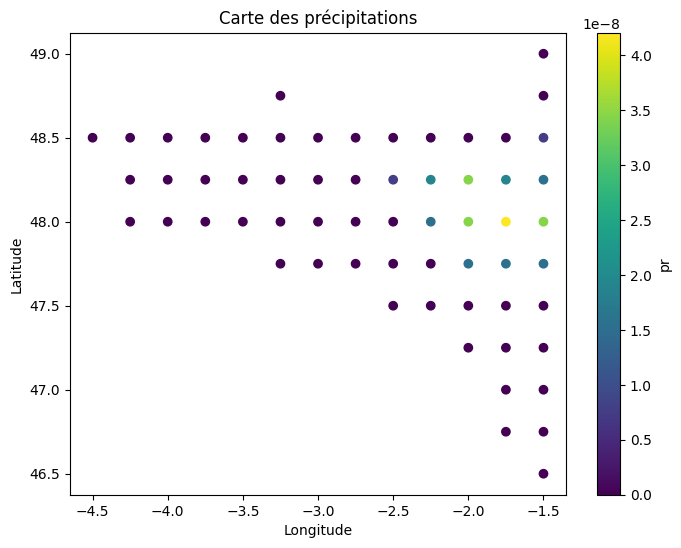

In [151]:
plt.figure(figsize=(8,6))
plt.scatter(df["Longitude"], df["Latitude"], c=df["pr"])
plt.colorbar(label="pr")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Carte des précipitations")
plt.show()

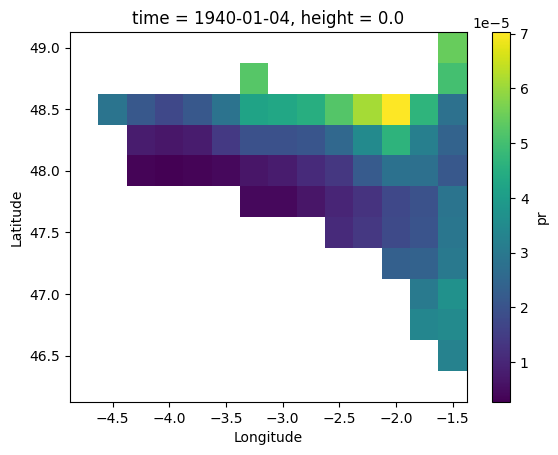

In [183]:
ds.pr[:,:,3].plot()


In [153]:
somme_quotidienne_pr_djf=ds_djf['pr'].sum(dim=['Latitude', 'Longitude'])
print(somme_quotidienne_pr_djf)
X= somme_quotidienne_pr_djf
print(len(X))

<xarray.DataArray 'pr' (time: 7550)> Size: 30kB
array([2.7539758e-07, 0.0000000e+00, 3.9131618e-03, ..., 1.3772695e-05,
       2.4685731e-05, 2.1683841e-03], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 60kB 1940-01-01 1940-01-02 ... 2023-02-28
    height   float64 8B ...
7550


In [154]:
#conversion de kg/m²/s en mm-1
seconds_per_day = 24 * 60 * 60  # 86400

X_mm_per_day = X * seconds_per_day # x(1000/1000)

# Mettre à jour le DataArray avec une nouvelle unité
X = X_mm_per_day.rename("pr_mm_per_day")
X.attrs['units'] = 'mm/day'
X.attrs['description'] = 'Précipitation journalière convertie de kg/m²/s → mm/j'

print(X)

<xarray.DataArray 'pr_mm_per_day' (time: 7550)> Size: 30kB
array([2.3794351e-02, 0.0000000e+00, 3.3809717e+02, ..., 1.1899608e+00,
       2.1328471e+00, 1.8734839e+02], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 60kB 1940-01-01 1940-01-02 ... 2023-02-28
    height   float64 8B ...
Attributes:
    units:        mm/day
    description:  Précipitation journalière convertie de kg/m²/s → mm/j


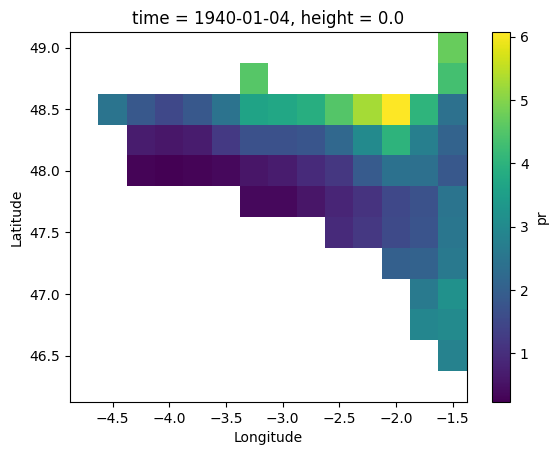

In [184]:
ds_djf['pr'] = ds['pr'] * 86400  # 86400 secondes = 1 jour
ds_djf.pr[:,:,3].plot()

## Visualisation des données de vents et définition de Y:

In [156]:
file_wind = '/content/drive/MyDrive/data/ERA5_wind_daily_1940_2023_FR_brittany.nc'
ds2 = xr.open_dataset(file_wind)

In [157]:
ds2.head()

<xarray.Dataset> Size: 708B
Dimensions:    (Latitude: 5, Longitude: 5, time: 5)
Coordinates:
  * Latitude   (Latitude) float64 40B 49.0 48.75 48.5 48.25 48.0
  * Longitude  (Longitude) float64 40B -4.75 -4.5 -4.25 -4.0 -3.75
  * time       (time) datetime64[ns] 40B 1940-01-01 1940-01-02 ... 1940-01-05
    lon        (Longitude) float64 40B ...
    lat        (Latitude) float64 40B ...
    height     float64 8B ...
Data variables:
    sfcWind    (Latitude, Longitude, time) float32 500B ...

In [158]:
ds2_djf = ds2.sel(time=ds2['time'].dt.month.isin([1, 2, 12]))
print(ds2_djf)
ds2_djf.sizes

<xarray.Dataset> Size: 5MB
Dimensions:    (Latitude: 12, Longitude: 14, time: 7550)
Coordinates:
  * Latitude   (Latitude) float64 96B 49.0 48.75 48.5 48.25 ... 46.75 46.5 46.25
  * Longitude  (Longitude) float64 112B -4.75 -4.5 -4.25 ... -2.0 -1.75 -1.5
  * time       (time) datetime64[ns] 60kB 1940-01-01 1940-01-02 ... 2023-02-28
    lon        (Longitude) float64 112B ...
    lat        (Latitude) float64 96B ...
    height     float64 8B ...
Data variables:
    sfcWind    (Latitude, Longitude, time) float32 5MB ...


Frozen({'Latitude': 12, 'Longitude': 14, 'time': 7550})

In [159]:
mean_quotidienne_sfcWind_djf=ds2_djf['sfcWind'].mean(dim=['Latitude', 'Longitude'])
print(mean_quotidienne_sfcWind_djf)
Y= mean_quotidienne_sfcWind_djf
print(len(Y))

<xarray.DataArray 'sfcWind' (time: 7550)> Size: 30kB
array([7.83476  , 7.0278034, 6.5031533, ..., 8.036705 , 7.9032116,
       7.3788795], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 60kB 1940-01-01 1940-01-02 ... 2023-02-28
    height   float64 8B ...
7550


# **Etude des précipitations (X): distribution normale**

Paramètres normale : 154.75986 232.3497
Log-vraisemblance maximale : -51847.22511276444
AIC = 103698.45022552888


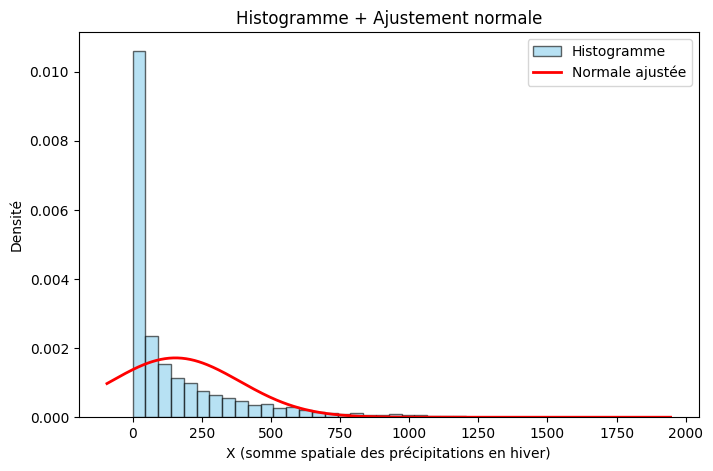

In [160]:

# Ajustement à la loi normale
mu, sigma = norm.fit(X)
print("Paramètres normale :", mu, sigma)

# Histogramme + densité normale ajustée
plt.figure(figsize=(8,5))

# Histogramme
plt.hist(X, bins=40, density=True, alpha=0.6, color='skyblue',
         edgecolor='black', label="Histogramme")

# Courbe théorique normale ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r-', lw=2, label="Normale ajustée")

plt.xlabel("X (somme spatiale des précipitations en hiver)")
plt.ylabel("Densité")
plt.title("Histogramme + Ajustement normale")
plt.legend()

# Log-vraisemblance
logL = np.sum(norm.logpdf(X, mu, sigma))
print("Log-vraisemblance maximale :", logL)

# AIC = 2k - 2 logL pour la normale (k = 2 paramètres : mu, sigma)
AIC_norm = 2*2 - 2*logL
print("AIC =", AIC_norm)


In [161]:


# ------ Shapiro-Wilk ------
shapiro_stat, shapiro_p = shapiro(X)
print("Test Shapiro-Wilk :")
print("  statistique =", shapiro_stat)
print("  p-value     =", shapiro_p, "\n")

# ------ KS (Kolmogorov-Smirnov) ------
ks_stat, ks_p = kstest(X, 'norm', args=(mu, sigma))
print("Test KS (paramètres estimés) :")
print("  statistique =", ks_stat)
print("  p-value     =", ks_p)



Test Shapiro-Wilk :
  statistique = 0.693839946624785
  p-value     = 2.6007497848650218e-79 

Test KS (paramètres estimés) :
  statistique = 0.25268329868908956
  p-value     = 0.0


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7550.
  res = hypotest_fun_out(*samples, **kwds)


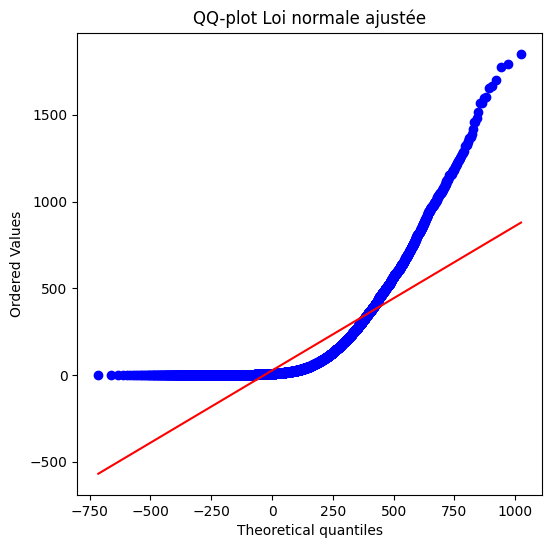

In [162]:
# Diagramme Quantile-Quantile de la normale
plt.figure(figsize=(6,6))
st.probplot(X, dist=norm, sparams=(mu, sigma), plot=plt)
plt.title("QQ-plot Loi normale ajustée")
plt.show()

**Principe du graphique Quantile-Quantile:**
+ *Axe Horizontal - Quantiles Théoriques:*
 Représente les quantiles théoriques de la distribution normale standard (ou de la distribution normale ajustée aux données).

+ *Axe Vertical - Quantiles réels :* Valeurs Ordonnées
 Représente les valeurs observées (ensemble de données), triées par ordre croissant.

Chaque point bleu représente une observation (Y) et le quantile théorique correspondant (X) qu'il devrait avoir si les données suivaient parfaitement la loi normale ajustée.

Si les données suivaient parfaitement la loi normale, tous les points devraient se situer exactement sur la droite y=x, car les quantiles théoriques seraient égaux aux quantiles observés.



**Analyse de ce Graphique**

Le QQ-plot montre un écart significatif par rapport à l'alignement parfait, indiquant que la distribution des données n'est pas normale :

+ Centre de la Distribution : les points suivent presque la droite, on a donc un comportement quasi-normale au centre.

+ Queue Gauche (Petites Valeurs) : Pas de valeurs négatives dans les précipitations alors que la loi normale centrée en µ (~145mm) en prévoit.

+ Queue Droite (Grandes Valeurs) : Les points bleus s'envolent au-dessus de la ligne rouge. Cela montre qu'il y a des valeurs extrêmes positives. Ces valeurs sont beaucoup plus élevées que ce qu'une distribution normale classique permettrait.

**Conclusion :** La distribution est fortement asymétrique et possède des queues plus épaisses que la distribution normale, ce qui invalide l'hypothèse de normalité pour cet ensemble de données.

On s'intéressera donc, ensuite, aux queues de distribution

# **Etude des queues de distribution pour les précipitations**

## Définition des variables:

On définit quatre variables :

1) **WinterPI :** la somme des précipitations sur tout l’hiver DJF (Décembre-Janvier-Février) en mm, calculée sur toutes les latitudes et longitudes.

2) **Somme_mois :** la somme des précipitations pour chaque mois de l’hiver DJF en mm, calculée sur toutes les latitudes et longitudes.

3) **pr_max_an :** la précipitation maximale observée sur un jour de chaque hiver (DJF), en mm, également intégrée sur toutes les latitudes et longitudes.

4) **pr_max_mois :** la valeur maximale de précipitation enregistrée sur un jour pour chaque mois, exprimée en mm et calculée en intégrant toutes les latitudes et longitudes.

In [163]:


# --- Somme journalière spatiale ---
somme_quotidienne_pr_djf = ds_djf['pr'].sum(dim=['Latitude', 'Longitude'])

# --- Somme totale par hiver ---
annee_hiver = ds_djf['time.year'].where(ds_djf['time.month'] != 12, ds_djf['time.year'] + 1)
WinterPI = ds_djf['pr'].groupby(annee_hiver).sum(dim=['time', 'Latitude', 'Longitude'])
WinterPI = WinterPI.assign_coords(year=np.unique(annee_hiver.values))

# --- Somme mensuelle ---
Somme_mois = ds_djf['pr'].groupby('time.month').sum(dim=['Latitude', 'Longitude'])


# Maximum journalier par mois (somme spatiale) pour chaque mois de chaque année
pr_journalier = ds_djf['pr'].sum(dim=['Latitude','Longitude'])

# --- Jour du maximum par an ---

pr_max_an = ds_djf['pr'].sum(dim=['Latitude','Longitude']).groupby('time.year').max()



# --- Affichage final ---
print("\n=== WinterPI (somme d'un hiver DJF) ===\n", WinterPI)
print("Nombre d'hivers :", len(WinterPI))

print("\n=== Somme par mois (DJF) ===\n", Somme_mois)
print("Nombre de mois DJF :", len(Somme_mois))

print("\n=== Max par mois (précipitation journalière max) ===\n",pr_max_an )
print("Nombre d'année :", len(pr_max_an))
pr_max_an.shape



=== WinterPI (somme d'un hiver DJF) ===
 <xarray.DataArray 'pr' (year: 84)> Size: 336B
array([ 8377.799 , 15172.459 ,  7901.8545, 16133.89  ,  6146.8125,
       11490.911 , 13386.957 , 11288.445 , 13297.986 , 12569.238 ,
       13358.568 , 17136.406 ,  9778.834 ,  9171.723 ,  8722.051 ,
       15582.819 , 11727.835 , 17879.463 , 15123.016 , 11449.756 ,
       18136.957 , 16163.619 , 14360.942 ,  8398.139 ,  6663.288 ,
       12529.6875, 20239.215 , 14259.468 , 11374.627 , 12065.504 ,
       15991.568 ,  9821.185 , 15085.014 ,  9259.478 , 17334.346 ,
        9132.387 ,  5769.491 , 17019.125 , 19609.29  , 24382.764 ,
       16323.769 ,  9715.227 , 18556.426 , 13831.113 , 15407.055 ,
       14046.289 , 16734.344 ,  9234.358 , 20176.715 ,  7646.9746,
       24017.86  , 12432.268 ,  3969.125 , 11236.785 , 18439.773 ,
       24608.36  , 14611.942 , 10769.965 , 12307.036 , 14642.007 ,
       16343.527 , 23885.414 , 11435.121 , 16348.952 , 15704.693 ,
        6946.047 ,  9393.963 , 18730.018 

(84,)

In [164]:
#max par mois
# Créer un DataArray 'year_month' correspondant à chaque date
year_month = xr.DataArray(
    ds_djf['time'].dt.year * 100 + ds_djf['time'].dt.month,  # format YYYYMM
    coords={'time': ds_djf['time']},
    dims='time'
)

# Maximum journalier par mois (somme spatiale)
pr_journalier = ds_djf['pr'].sum(dim=['Latitude', 'Longitude'])
pr_max_mois = pr_journalier.groupby(year_month).max()

print(pr_max_mois)
print("Nombre de mois :", len(pr_max_mois))


<xarray.DataArray 'pr' (group: 251)> Size: 2kB
array([ 850.2220459 ,  464.00048828,  769.93200684, 1794.25537109,
        762.6328125 ,  342.68151855,  726.2164917 ,  280.86608887,
        811.66278076, 1852.70739746,  680.73205566,  852.71228027,
        595.66345215,  221.47875977, 1219.31616211,  554.06793213,
        679.87469482,  637.32244873,  766.44262695,  605.54882812,
        913.55566406,  479.22973633,  570.29772949, 1202.86474609,
       1006.94647217,  264.10003662, 1100.08166504,  943.22338867,
        407.48904419,  551.35992432,  535.56384277, 1184.3659668 ,
        873.37780762,  719.40411377, 1286.73046875,  740.32434082,
        544.80175781,  301.4230957 , 1117.35253906,  524.01147461,
        519.02972412,  298.7855835 ,  802.26483154,  721.10748291,
        832.33569336, 1196.89672852,  900.93688965,  650.94091797,
        959.5255127 ,  149.84983826,  799.70690918,  254.70201111,
        993.44018555,  720.20758057,  839.918396  ,  819.25268555,
        567.833

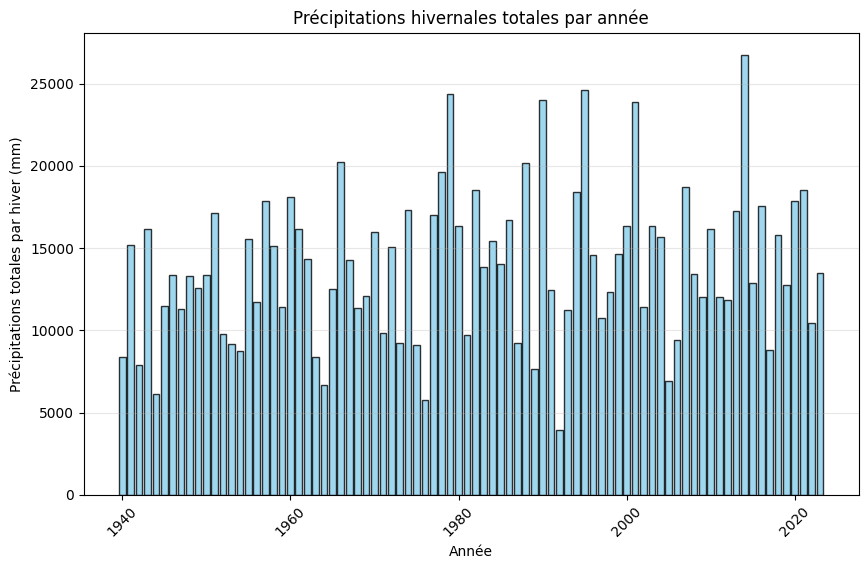

In [165]:
# Histogramme des précipitations par hiver pour chaque année
plt.figure(figsize=(10,6))
plt.bar(WinterPI.year, WinterPI.values, color='skyblue', edgecolor='black', alpha=0.8)
plt.xlabel("Année")
plt.ylabel("Précipitations totales par hiver (mm)")
plt.title("Précipitations hivernales totales par année")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

## GEV sur les maximums hivernaux de précipitation

mu: 1126.0542566208612 sigma: 283.617696970373


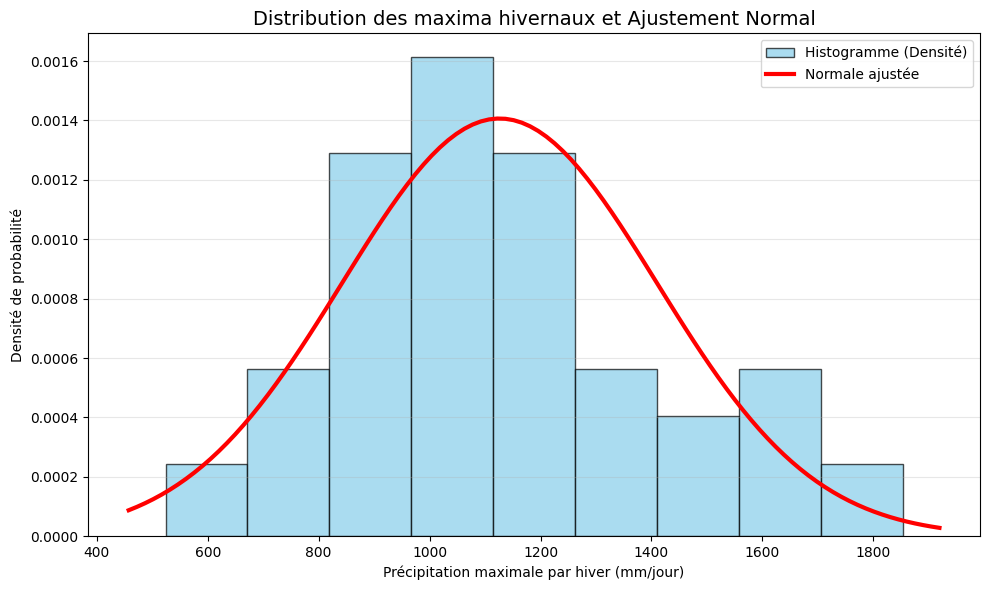

In [166]:
# --- Tracé de l'histogramme en densité ---
plt.figure(figsize=(10,6))
# Calculer le nombre de bins (sqrt(N) ici) pour le pas de l'histogramme
bins = int(np.sqrt(len(pr_max_an.values)))

plt.hist(pr_max_an.values, bins=bins, density=True,
         color='skyblue', edgecolor='black', alpha=0.7,
         label='Histogramme (Densité)')

# --- Courbe normale ajustée ---
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 100)

mu, sigma = norm.fit(pr_max_an.values)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r-', lw=3,
         label=f'Normale ajustée')
print("mu:", mu, "sigma:", sigma)

# --- Labels et légende ---
plt.xlabel("Précipitation maximale par hiver (mm/jour)")
plt.ylabel("Densité de probabilité")
plt.title("Distribution des maxima hivernaux et Ajustement Normal", fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Paramètres GEV ajustés :
 c (shape) = 0.107, loc1 = 1006.42, scale1 = 246.88


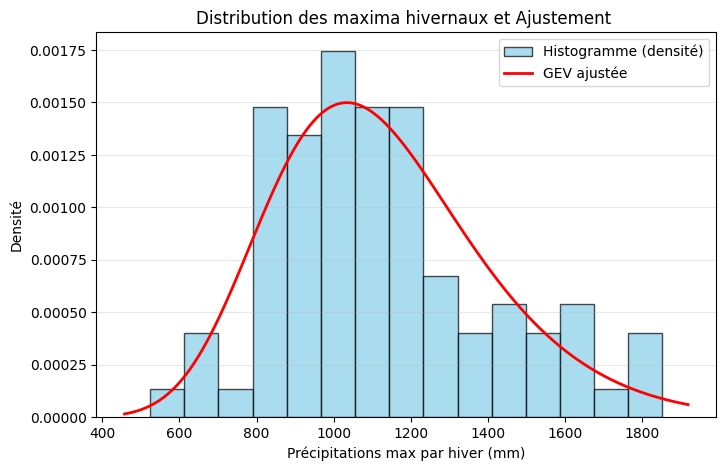

In [210]:

# --- Ajustement GEV ---
# genextreme utilise un paramètre c1 (shape), loc1 (location), scale1 (scale)
c1, loc1, scale1 = genextreme.fit(pr_max_an.values)
print(f"Paramètres GEV ajustés :\n c (shape) = {c1:.3f}, loc1 = {loc1:.2f}, scale1 = {scale1:.2f}")

# --- Histogramme en densité ---
plt.figure(figsize=(8,5))
plt.hist(pr_max_an.values, bins=15, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histogramme (densité)')

# --- Courbe GEV ajustée ---
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, genextreme.pdf(xx, c1, loc1, scale1), 'r-', lw=2, label='GEV ajustée')

# --- Labels et légende ---
plt.xlabel("Précipitations max par hiver (mm)")
plt.ylabel("Densité")
plt.title("Distribution des maxima hivernaux et Ajustement ")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()



ξ=c (paramètre de forme ou shape)

μ=loc (paramètre de position ou location)

σ=scale (paramètre d'échelle ou scale)

In [207]:

# Construction de la CDF paramétrée
gev_cdf = lambda x: genextreme(c1, loc1, scale1).cdf(x)

# KS-test
ks_stat, ks_p = kstest(WinterPI.values, gev_cdf)

print("Test KS (GEV ajustée) :")
print("  Statistique =", ks_stat)
print("  p-value     =", ks_p)

# Log-vraisemblance
logL = np.sum(genextreme.logpdf(WinterPI.values, c1, loc1, scale1))
print("Log-vraisemblance maximale :", logL)

# AIC = 2k - 2 logL pour la normale (k = 2 paramètres)
AIC_norm = 2*3 - 2*logL
print("AIC =", AIC_norm)



Test KS (GEV ajustée) :
  Statistique = 1.0
  p-value     = 0.0
Log-vraisemblance maximale : -inf
AIC = inf


**Raisons du Mauvais Ajustement**

On a trop peu de valeurs

## GEV sur les maximums mensuels de précipitation

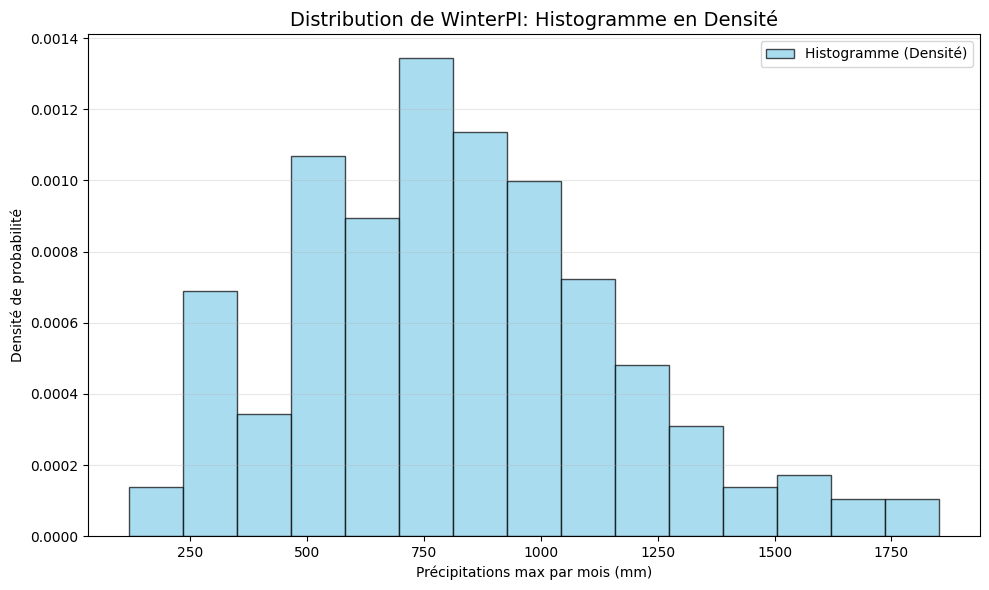

In [198]:
# --- Tracé de l'histogramme en densité ---
plt.figure(figsize=(10,6))
# Calculer le nombre de bins (souvent sqrt(N) ou formule de Freedman-Diaconis)
bins = int(np.sqrt(len(pr_max_mois)))

plt.hist(pr_max_mois, bins=bins, density=True,
         color='skyblue', edgecolor='black', alpha=0.7,
         label='Histogramme (Densité)')

# --- Labels et légende ---
plt.xlabel("Précipitations max par mois (mm)")
plt.ylabel("Densité de probabilité")
plt.title("Distribution de WinterPI: Histogramme en Densité", fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Paramètres GEV ajustés :
 c (shape) = -5.748, loc2 = 118.06, scale2 = 2.69


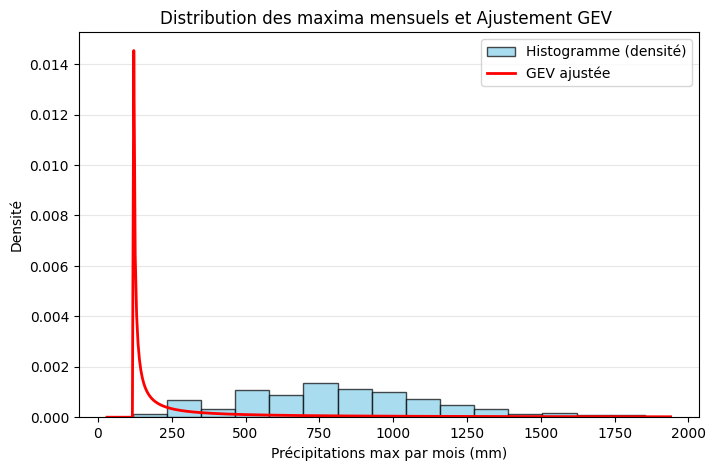

In [212]:
# --- Ajustement GEV ---
# genextreme utilise un paramètre c2 (shape), loc2 (location), scale2 (scale)
c2, loc2, scale2 = genextreme.fit(pr_max_mois.values)
print(f"Paramètres GEV ajustés :\n c (shape) = {c2:.3f}, loc2 = {loc2:.2f}, scale2 = {scale2:.2f}")

# --- Histogramme en densité ---
plt.figure(figsize=(8,5))
plt.hist(pr_max_mois.values, bins=15, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histogramme (densité)')

# --- Courbe GEV ajustée ---
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, genextreme.pdf(xx, c2, loc2, scale2), 'r-', lw=2, label='GEV ajustée')

# --- Labels et légende ---
plt.xlabel("Précipitations max par mois (mm)")
plt.ylabel("Densité")
plt.title("Distribution des maxima mensuels et Ajustement GEV ")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()


In [200]:
# Construction de la CDF paramétrée
gev_cdf = lambda x: genextreme(c2, loc2, scale2).cdf(x)

# KS-test
ks_stat, ks_p = kstest(pr_max_mois, gev_cdf)

print("Test KS (GEV ajustée) :")
print("  Statistique =", ks_stat)
print("  p-value     =", ks_p)

Test KS (GEV ajustée) :
  Statistique = 0.6682615331294652
  p-value     = 5.30159468737167e-111


## GPD sur le cumul hivernal de précipitation

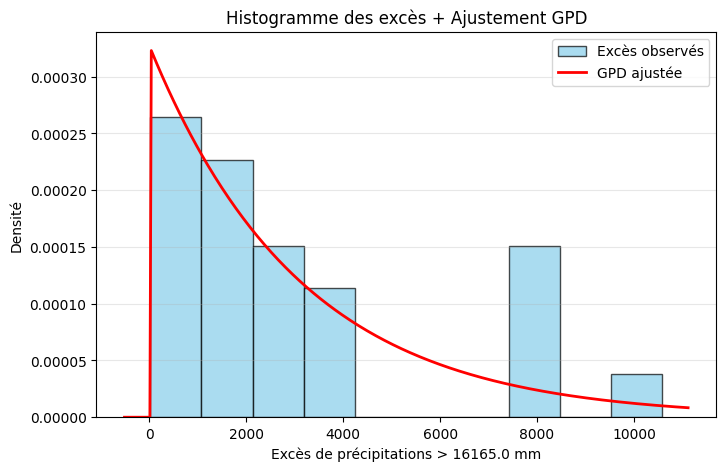

Paramètres GPD : shape(c)=-0.015, loc=12.4, scale=3070.9


In [172]:

# --- 1. Choisir un seuil pour les extrêmes ---
seuil = np.percentile(WinterPI.values, 70)  # 70ème percentile
exceedances = WinterPI.values[WinterPI.values > seuil] - seuil  # excès au-dessus du seuil

# --- 2. Ajuster la GPD aux excès ---
c, loc, scale = genpareto.fit(exceedances)

# --- 3. Histogramme des excès (densité) ---
plt.figure(figsize=(8,5))
plt.hist(exceedances, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Excès observés')

# --- 4. Courbe GPD ajustée ---
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, genpareto.pdf(xx, c, loc=loc, scale=scale), 'r-', lw=2, label='GPD ajustée')

# --- 5. Labels et légende ---
plt.xlabel(f"Excès de précipitations > {seuil:.1f} mm")
plt.ylabel("Densité")
plt.title("Histogramme des excès + Ajustement GPD")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

# --- 6. Affichage des paramètres ---
print(f"Paramètres GPD : shape(c)={c:.3f}, loc={loc:.1f}, scale={scale:.1f}")


In [173]:
# Construction de la  paramétrée
gpd_cdf = lambda x: genpareto(c, loc=loc, scale=scale).cdf(x)

# KS-test
ks_stat, ks_p = kstest(exceedances, gpd_cdf)

print("Test KS (GPD ajustée) :")
print("  Statistique =", ks_stat)
print("  p-value     =", ks_p)

# Log-vraisemblance
logL = np.sum(genpareto.logpdf(exceedances, c, loc=loc, scale=scale))
print("Log-vraisemblance maximale :", logL)

# AIC = 2k - 2 logL pour la normale (k = 3)
AIC_norm = 2*3 - 2*logL
print("AIC =", AIC_norm)

Test KS (GPD ajustée) :
  Statistique = 0.12264401154475968
  p-value     = 0.8030411135576355
Log-vraisemblance maximale : -225.36163823556
AIC = 456.72327647112


**Remarque**: on a peu de valeurs pourtant on a pris un seuil bas, donc on passe au cumul par mois

## GPD sur le cumul mensuel de précipitation

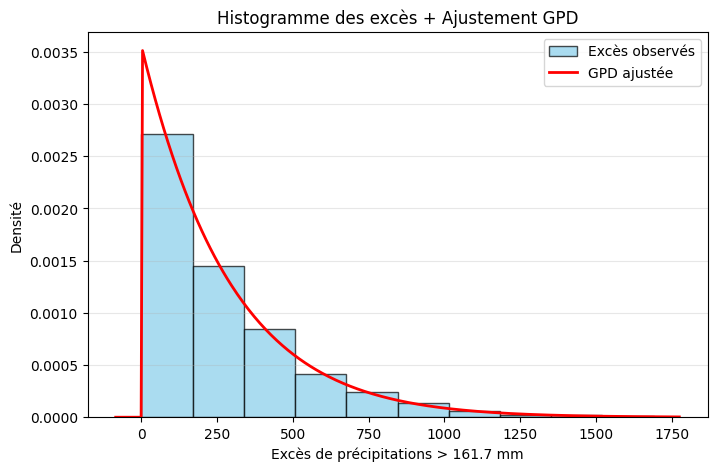

Paramètres GPD : shape(c)=-0.045, loc=0.1, scale=280.8


In [174]:
# --- 1. Choisir un seuil pour les extrêmes ---
seuil = np.percentile(Somme_mois, 70)  # 70ème percentile
exceedances = Somme_mois[Somme_mois > seuil] - seuil  # excès au-dessus du seuil

# --- 2. Ajuster la GPD aux excès ---
c, loc, scale = genpareto.fit(exceedances)

# --- 3. Histogramme des excès (densité) ---
plt.figure(figsize=(8,5))
plt.hist(exceedances, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Excès observés')

# --- 4. Courbe GPD ajustée ---
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, genpareto.pdf(xx, c, loc=loc, scale=scale), 'r-', lw=2, label='GPD ajustée')

# --- 5. Labels et légende ---
plt.xlabel(f"Excès de précipitations > {seuil:.1f} mm")
plt.ylabel("Densité")
plt.title("Histogramme des excès + Ajustement GPD")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

# --- 6. Affichage des paramètres ---
print(f"Paramètres GPD : shape(c)={c:.3f}, loc={loc:.1f}, scale={scale:.1f}")

In [175]:
# Construction de la  paramétrée
gpd_cdf = lambda x: genpareto(c, loc=loc, scale=scale).cdf(x)

# KS-test
ks_stat, ks_p = kstest(exceedances, gpd_cdf)

print("Test KS (GPD ajustée) :")
print("  Statistique =", ks_stat)
print("  p-value     =", ks_p)

# Log-vraisemblance
logL = np.sum(genpareto.logpdf(exceedances, c, loc=0, scale=scale))
print("Log-vraisemblance maximale :", logL)

# AIC = 2k - 2 logL pour la normale (k = 3)
AIC_norm = 2*3 - 2*logL
print("AIC =", AIC_norm)

Test KS (GPD ajustée) :
  Statistique = 0.015636077888671218
  p-value     = 0.6311714352858877
Log-vraisemblance maximale : -14933.915863363876
AIC = 29873.831726727753


# **Etude des vents (Y): distribution normale**

Paramètres normale : 6.404704 2.435008
Log-vraisemblance maximale : -17432.108996604413
AIC = 34868.217993208826
Test Shapiro-Wilk :
  statistique = 0.9672969459683689
  p-value     = 2.9708778349767306e-38 

Test KS :
  statistique = 0.05665506752885069
  p-value     = 1.6627855320132638e-21


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7550.
  res = hypotest_fun_out(*samples, **kwds)


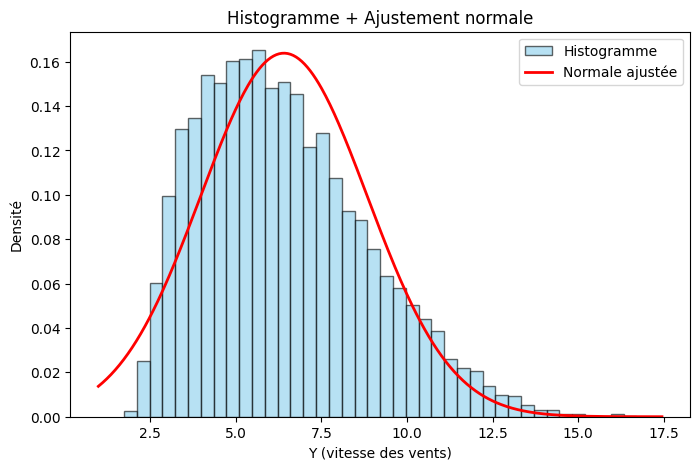

In [176]:
# Pour Y
# Ajustement à la loi normale
mu, sigma = norm.fit(Y)
print("Paramètres normale :", mu, sigma)

# Histogramme + densité normale ajustée
plt.figure(figsize=(8,5))

# Histogramme
plt.hist(Y, bins=40, density=True, alpha=0.6, color='skyblue',
         edgecolor='black', label="Histogramme")

# Courbe théorique normale ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r-', lw=2, label="Normale ajustée")

plt.xlabel("Y (vitesse des vents)")
plt.ylabel("Densité")
plt.title("Histogramme + Ajustement normale")
plt.legend()

# Log-vraisemblance
logL = np.sum(norm.logpdf(Y, mu, sigma))
print("Log-vraisemblance maximale :", logL)

# AIC = 2k - 2 logL pour la normale (k = 2 paramètres : mu, sigma)
AIC_norm = 2*2 - 2*logL
print("AIC =", AIC_norm)

# ------ Shapiro-Wilk ------
shapiro_stat, shapiro_p = shapiro(Y)
print("Test Shapiro-Wilk :")
print("  statistique =", shapiro_stat)
print("  p-value     =", shapiro_p, "\n")

# ------ KS (Kolmogorov-Smirnov) ------
ks_stat, ks_p = kstest(Y, 'norm', args=(mu, sigma))
print("Test KS :")
print("  statistique =", ks_stat)
print("  p-value     =", ks_p)


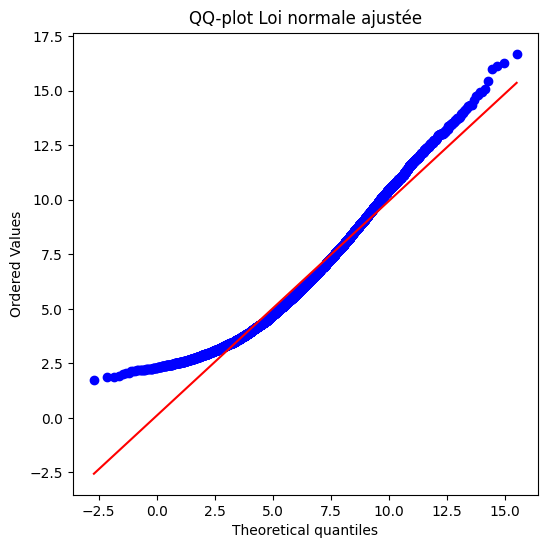

In [177]:
# Diagramme Quantile-Quantile de la noramle
plt.figure(figsize=(6,6))
st.probplot(Y, dist=norm, sparams=(mu, sigma), plot=plt)
plt.title("QQ-plot Loi normale ajustée")
plt.show()

# **Etude des queues de distribution pour les vents**

##  GEV max mensuel

In [178]:
# --- Grouper par année et par mois ---
Y_max = Y.groupby('time.year').map(lambda x: x.groupby('time.month').max(dim='time'))

# --- Transformer en numpy array (shape = nb_annees × 3) ---
Y_max_values = np.array([x.values for x in Y_max])
print("Shape avant flatten :", Y_max_values.shape)

# --- Transformer en vecteur 1D (flatten) ---
Y_max_month = Y_max_values.flatten()
print("Shape après flatten :", Y_max_month.shape)

# --- Affichage des 20 premières valeurs ---
print(Y_max_month)


Shape avant flatten : (84, 3)
Shape après flatten : (252,)
[ 7.83476019 10.09995174 11.20478725 11.36468315 13.50259209 11.81658554
 12.40323544  8.05217934  9.75095367 14.13482189 10.60959911 11.50073338
 10.40312099  9.174263   11.91625309 11.89690304 11.68322372 11.62458229
 12.69151115 12.29220486 11.75441837  8.58282757  7.65015554 11.08776093
 11.05125523  9.63924217 11.00717258 13.68508339 12.07698059  9.69643879
  7.81553125 12.58375168 10.14964485 11.85835171 14.196702   13.02904987
 12.18385696  9.53630257 11.44875908 10.08596992 12.15663052  7.80696297
 10.04051399 10.71097279 11.79619408 12.22029114 11.93211174 12.85323143
  9.89169025  9.5182848  10.98441601  9.88213634 11.21700287 10.84153938
 11.98259163 11.10270596 10.94130802 12.62800503  8.33229256 12.30474567
 11.94175243  9.79757881 11.62707233 11.61027718 11.22255135 11.81040096
 13.01651192 11.28274059 10.92477703 10.21255302  9.26666164  8.81964397
  7.04698086  8.37510967 10.15585804 11.72894955  7.79507065 13.4

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2524859876.py:16: SyntaxWarning: invalid escape sequence '\m'
  label=f'Normale ajustée\n($\mu$={mu:.0f}, $\sigma$={sigma:.0f})')
/tmp/ipython-input-2524859876.py:16: SyntaxWarning: invalid escape sequence '\s'
  label=f'Normale ajustée\n($\mu$={mu:.0f}, $\sigma$={sigma:.0f})')


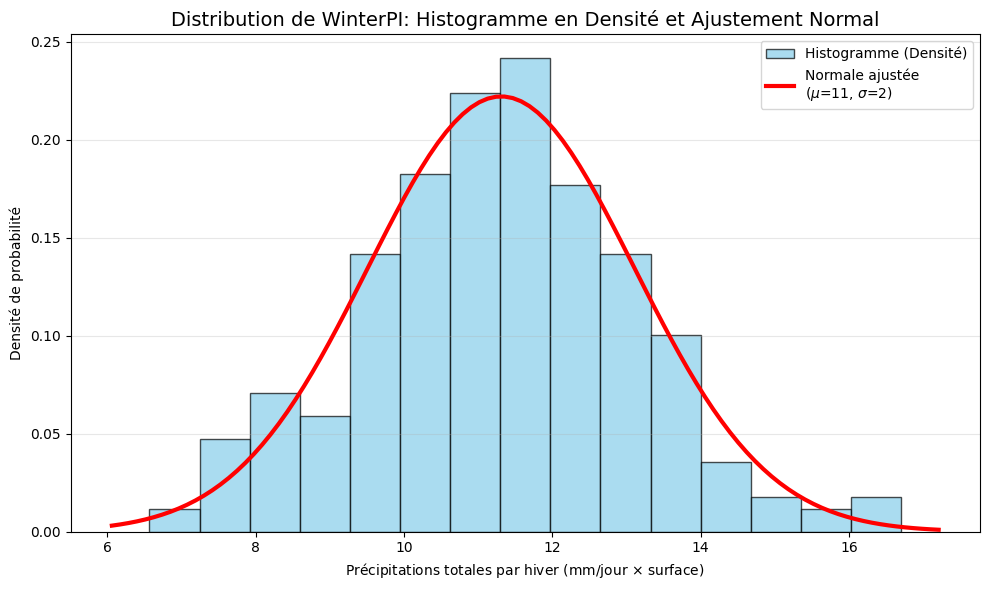

In [179]:
# --- Tracé de l'histogramme en densité ---
plt.figure(figsize=(10,6))
# Calculer le nombre de bins (souvent sqrt(N) ou formule de Freedman-Diaconis)
bins = int(np.sqrt(len(Y_max_month[:-1])))

plt.hist(Y_max_month[:-1], bins=bins, density=True,
         color='skyblue', edgecolor='black', alpha=0.7,
         label='Histogramme (Densité)')

# --- Courbe normale ajustée ---
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 100)
# Utilisez les vraies valeurs mu et sigma obtenues
mu, sigma = norm.fit(Y_max_month[:-1])
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r-', lw=3,
         label=f'Normale ajustée\n($\mu$={mu:.0f}, $\sigma$={sigma:.0f})')

# --- Labels et légende ---
plt.xlabel("Précipitations totales par hiver (mm/jour $\\times$ surface)")
plt.ylabel("Densité de probabilité")
plt.title("Distribution de WinterPI: Histogramme en Densité et Ajustement Normal", fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [180]:

# ------ Shapiro-Wilk ------
shapiro_stat, shapiro_p = shapiro(Y_max_month[:-1])
print("Test Shapiro-Wilk :")
print("  statistique =", shapiro_stat)
print("  p-value     =", shapiro_p, "\n")

# ------ KS (Kolmogorov-Smirnov) ------
ks_stat, ks_p = kstest(Y_max_month[:-1], 'norm', args=(mu, sigma))
print("Test KS (paramètres estimés) :")
print("  statistique =", ks_stat)
print("  p-value     =", ks_p)


Test Shapiro-Wilk :
  statistique = 0.9950057249226881
  p-value     = 0.5878888963541303 

Test KS (paramètres estimés) :
  statistique = 0.02855004464111699
  p-value     = 0.983136726462895


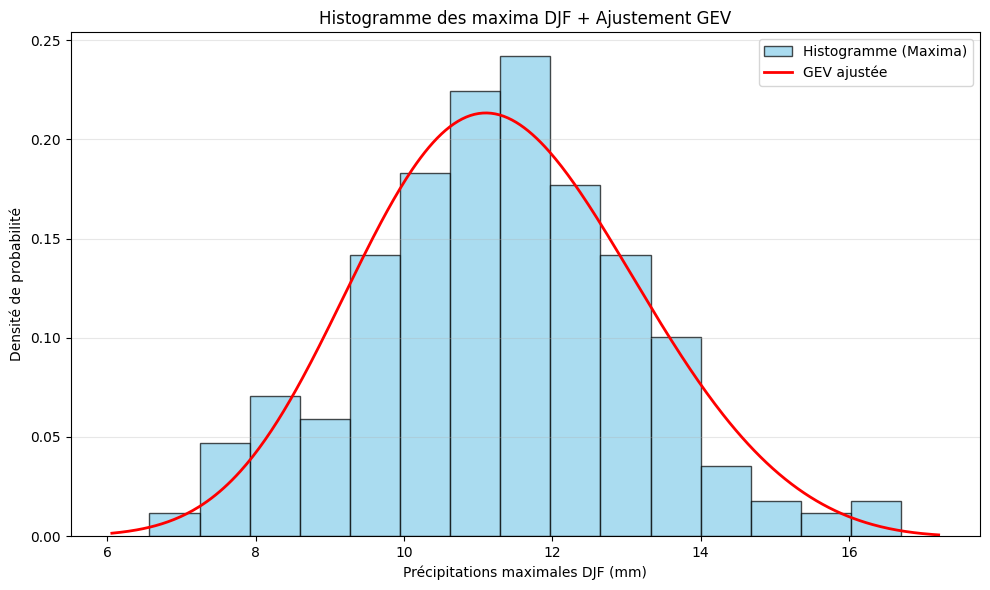

Paramètres GEV : shape(c)=0.237, loc=10.6, scale=1.8


In [181]:


# Ajustement GEV
c, loc, scale = genextreme.fit(Y_max_month[:-1])

# Histogramme des maxima
plt.figure(figsize=(10,6))
bins = int(np.sqrt(len(Y_max_month[:-1])))
plt.hist(Y_max_month[:-1], bins=bins, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histogramme (Maxima)')

# Courbe GEV ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, genextreme.pdf(xx, c, loc=loc, scale=scale), 'r-', lw=2, label='GEV ajustée')

plt.xlabel("Précipitations maximales DJF (mm)")
plt.ylabel("Densité de probabilité")
plt.title("Histogramme des maxima DJF + Ajustement GEV")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Paramètres GEV
print(f"Paramètres GEV : shape(c)={c:.3f}, loc={loc:.1f}, scale={scale:.1f}")


In [182]:
# Construction de la CDF paramétrée
gev_cdf = lambda x: genextreme(c, loc=loc, scale=scale).cdf(x)

# KS-test
ks_stat, ks_p = kstest(Y_max_month[:-1], gev_cdf)

print("Test KS (GEV ajustée) :")
print("  Statistique =", ks_stat)
print("  p-value     =", ks_p)

Test KS (GEV ajustée) :
  Statistique = 0.03539598142003553
  p-value     = 0.9003669148262775
